In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
"""
pip install tensorflow
import tensorflow as tf
print(tf.__version__)
"""

'\npip install tensorflow\nimport tensorflow as tf\nprint(tf.__version__)\n'

In [4]:
# Load and Prepare the Dataset

In [5]:
df = pd.read_csv(r"D:\DataScience\Datascience Assignment\20 monthly_milk_production.csv")
df.columns = ['Date', 'Milk']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Milk
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


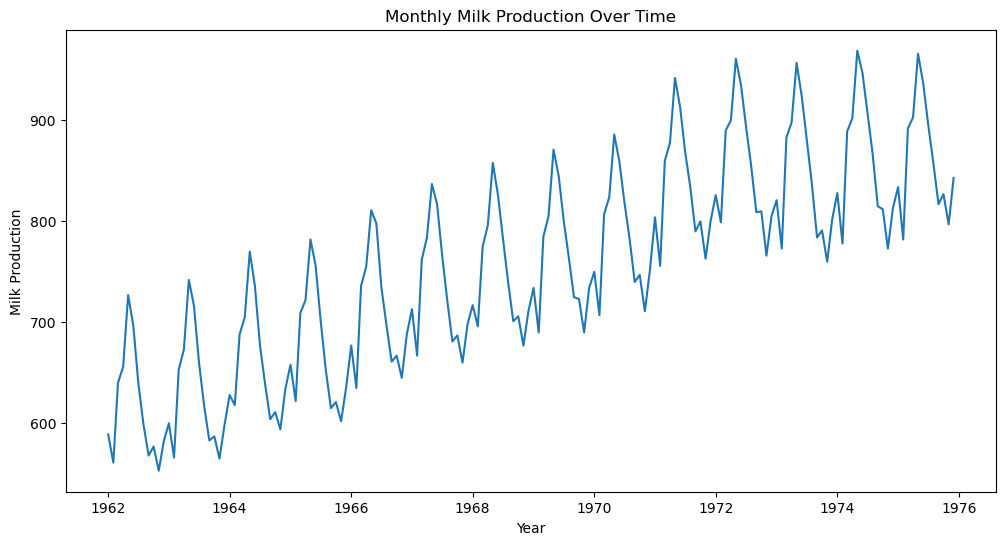

In [6]:
# Exploratory Data Analysis (EDA)
# Time series plot
plt.figure(figsize=(12,6))
plt.plot(df['Milk'])
plt.title("Monthly Milk Production Over Time")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.show()

In [7]:
# Data Normalization (Required for RNNs)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Milk']])

In [8]:
# Create Time-Series Sequences
def create_sequences(data, window=12):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

In [9]:
X, y = create_sequences(scaled_data, window=12)

In [10]:
# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [49]:
# Model 1: Basic RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(12,1)),
    Dense(1)
])


C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0423
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020  
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0019
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0018
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━

In [51]:

# Model 2: LSTM

In [52]:
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(12,1)),
    Dense(1)
])

In [53]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1170
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0298
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0303
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0247
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0256
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0235
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0234
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0231
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0229
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0227
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0240
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0219
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0213
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━

In [54]:
# Model 3: GRU

In [55]:
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(12,1)),
    Dense(1)
])

In [56]:
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1311
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0335
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0330
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0253
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0231
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0229
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0209
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0204
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0197
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0192
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0189 
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0183
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0179 
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━

In [57]:
# Model Evaluation
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [58]:
# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test)
rnn_pred_inv = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
gru_pred_inv = scaler.inverse_transform(gru_pred)
#print(y_test_inv)
#print(lstm_pred_inv)
#print(rnn_pred_inv)
#print(gru_pred_inv)

In [59]:
# Error Metrics
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

In [60]:
print("RNN  RMSE, MAE:", metrics(y_test_inv, rnn_pred_inv))
print("LSTM RMSE, MAE:", metrics(y_test_inv, lstm_pred_inv))
print("GRU  RMSE, MAE:", metrics(y_test_inv, gru_pred_inv))

RNN  RMSE, MAE: (np.float64(20.638151645903605), 16.10452079772949)
LSTM RMSE, MAE: (np.float64(46.99192687066602), 39.51077842712402)
GRU  RMSE, MAE: (np.float64(41.95250712355588), 32.98101234436034)


In [61]:
# Forecast Next 12 Months ( Model: LSTM)
last_window = scaled_data[-12:]
future = []

In [62]:
for _ in range(12):
    pred = lstm_model.predict(last_window.reshape(1,12,1))
    future.append(pred[0])
    last_window = np.append(last_window[1:], pred, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [63]:
future = scaler.inverse_transform(future)

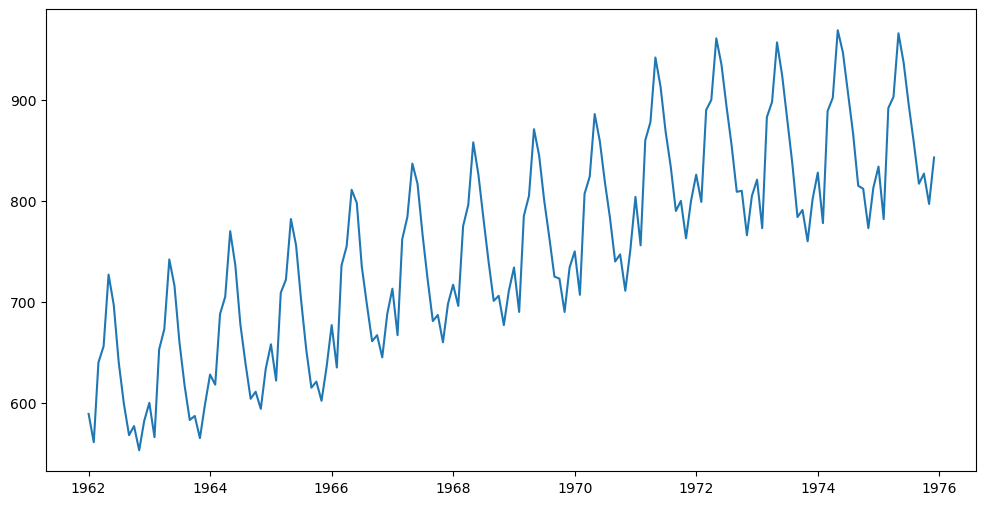

In [64]:
# Visualization: Actual vs Forecast
plt.figure(figsize=(12,6))
plt.plot(df['Milk'], label='Actual')
#future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]
future_dates = pd.date_range(df.index[-1], periods=13, freq='ME')[1:]

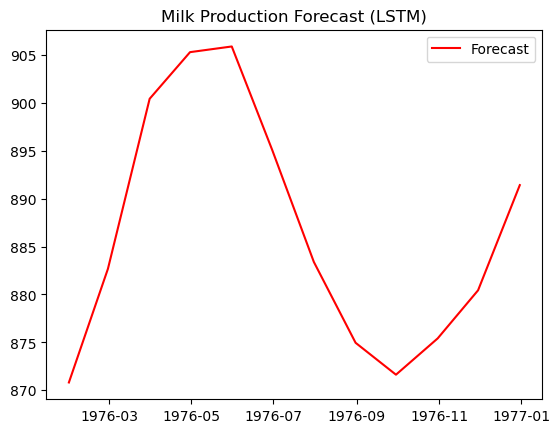

In [65]:
plt.plot(future_dates, future, label='Forecast', color='red')
plt.legend()
plt.title("Milk Production Forecast (LSTM)")
plt.show()

In [66]:
# Model Comparison
"""
Model	 |   Strength	     | Limitation
RNN	        Simple	          Vanishing gradient
LSTM	    Best accuracy	  Higher computation
GRU	        Faster than LSTM  Slightly less accurate
"""

'\nModel\t |   Strength\t     | Limitation\nRNN\t        Simple\t          Vanishing gradient\nLSTM\t    Best accuracy\t  Higher computation\nGRU\t        Faster than LSTM  Slightly less accurate\n'

In [67]:
"""
# Final Conclusion
In this study, deep learning models including RNN, LSTM,
 and GRU were implemented to forecast monthly milk production.
 Among them, LSTM achieved the best performance due to its ability to 
 capture long-term dependencies and seasonality.
 The forecast can help dairy businesses improve planning,
 reduce waste, and ensure consistent supply.
 """

'\n# Final Conclusion\nIn this study, deep learning models including RNN, LSTM,\n and GRU were implemented to forecast monthly milk production.\n Among them, LSTM achieved the best performance due to its ability to \n capture long-term dependencies and seasonality.\n The forecast can help dairy businesses improve planning,\n reduce waste, and ensure consistent supply.\n '